In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Seperating the Numerical and Categorical Columns

In [5]:
num_cols = df.select_dtypes('number').columns
cat_cols=df.select_dtypes(exclude='number').columns
num_cols,cat_cols

(Index(['age', 'bmi', 'children', 'charges'], dtype='object'),
 Index(['sex', 'smoker', 'region'], dtype='object'))

## Identifying the Outliers and Handling the Outliers

<AxesSubplot:>

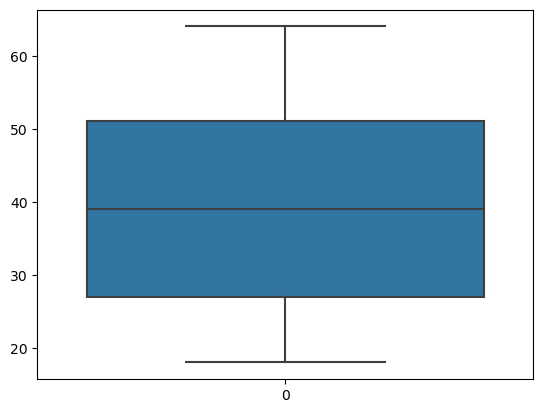

In [6]:
sns.boxplot(data = df['age']) # No outliers in age column

<AxesSubplot:>

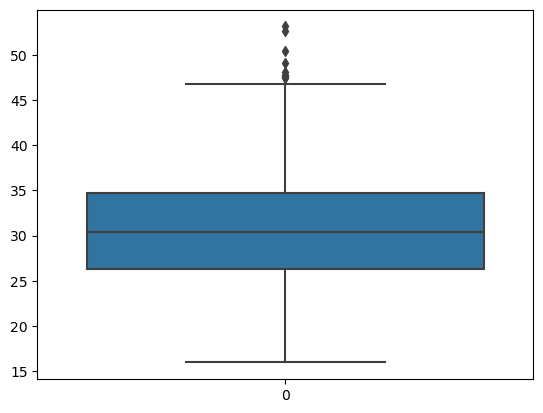

In [7]:
sns.boxplot(data = df['bmi'])

In [8]:
df['bmi'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334     True
1335     True
1336     True
1337     True
Name: bmi, Length: 1338, dtype: bool

<AxesSubplot:>

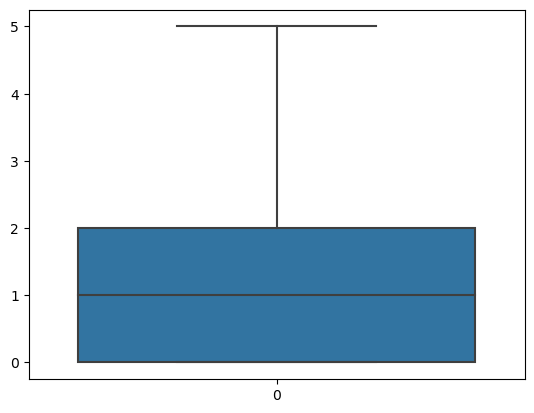

In [9]:
sns.boxplot(data = df['children'])

<AxesSubplot:>

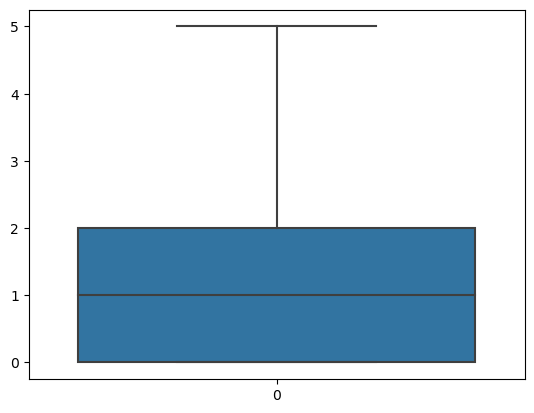

In [10]:
sns.boxplot(data = df['children'])

<AxesSubplot:>

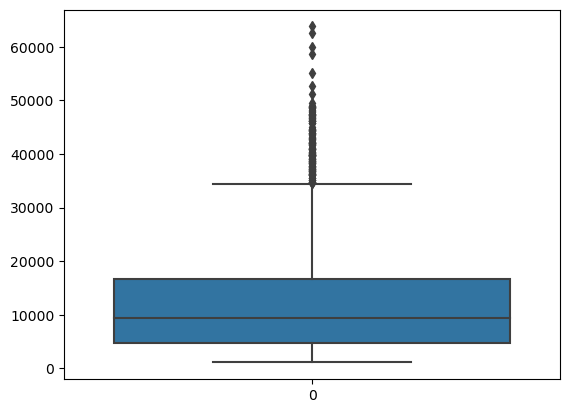

In [11]:
sns.boxplot(data = df['charges'])

In [12]:
upper_limit = df['charges'].mean() + 3 * df['charges'].std()
lower_limit = df['charges'].mean() - 3 * df['charges'].std()
new_df = df.loc[(df['charges'] < upper_limit) & (df['charges'] > lower_limit)]
upper_limit1 = new_df['bmi'].mean() + 3 * new_df['bmi'].std()
lower_limit1 = new_df['bmi'].mean() - 3 * new_df['bmi'].std()
new2_df = new_df.loc[(new_df['bmi'] < upper_limit1) & (new_df['bmi'] > lower_limit1)]

In [13]:
new2_df.shape

(1327, 7)

In [14]:
new2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1327 non-null   int64  
 1   sex       1327 non-null   object 
 2   bmi       1327 non-null   float64
 3   children  1327 non-null   int64  
 4   smoker    1327 non-null   object 
 5   region    1327 non-null   object 
 6   charges   1327 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 82.9+ KB


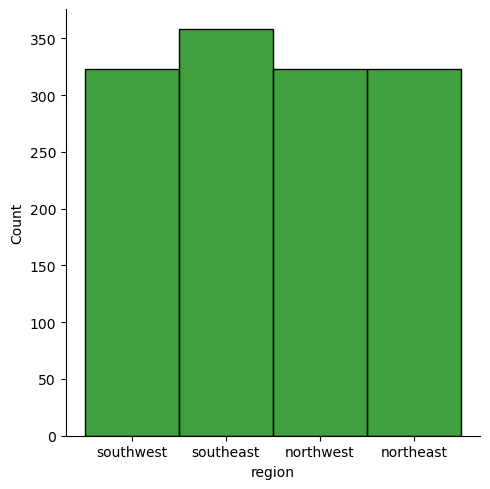

In [15]:
sns.displot(new2_df['region'], kde = False, color ='green', bins = 200)

<AxesSubplot:xlabel='charges', ylabel='Density'>

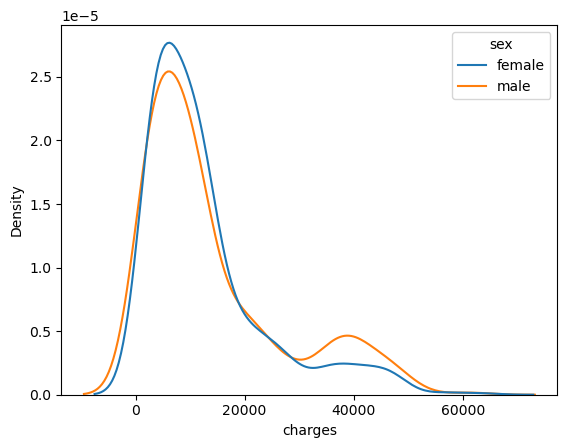

In [16]:
sns.kdeplot(df['charges'],hue='sex',data=df)

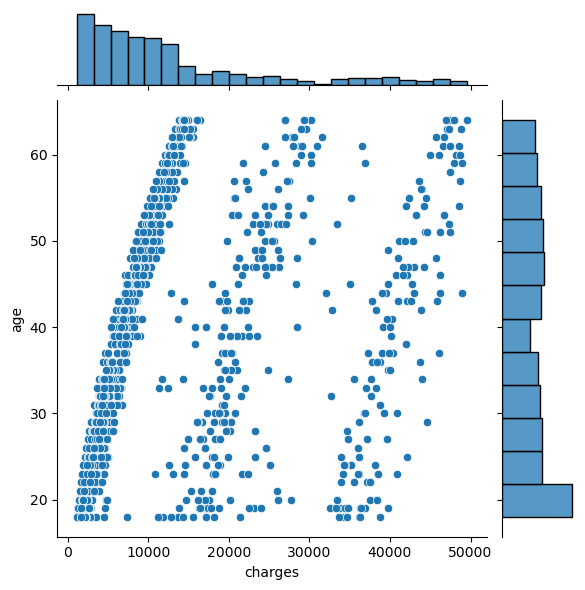

In [17]:
sns.jointplot(x ='charges', y ='age', data = new2_df)

<Figure size 2000x1500 with 0 Axes>

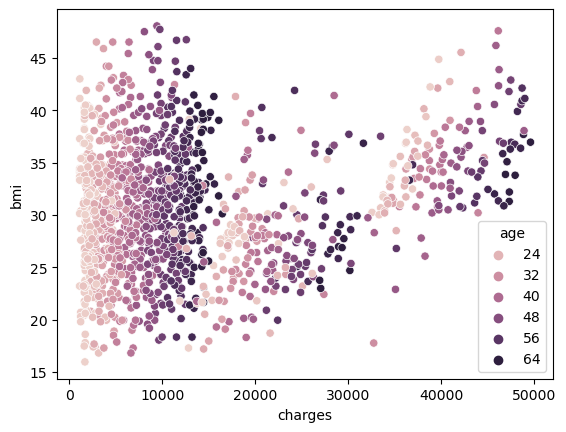

<Figure size 2000x1500 with 0 Axes>

In [18]:
sns.scatterplot(data = new2_df, x = 'charges', y = 'bmi', hue = 'age')
plt.figure(figsize = (20, 15))

<AxesSubplot:>

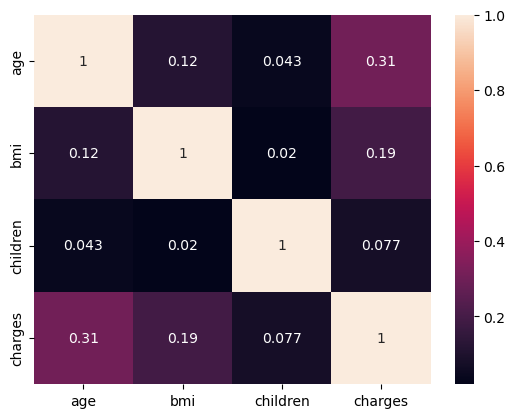

In [19]:
sns.heatmap(new2_df.corr(), annot = True)

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [20]:
import sklearn

print(sklearn.__version__)

1.2.1


In [21]:
new2_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
# Identifying the inputs (X) and output (y)

y = new2_df['charges']


X = new2_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]


In [23]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [24]:
X_train.head()

,age,sex,bmi,children,smoker,region
1201,46,male,40.375,2,no,northwest
707,49,male,28.690,3,no,northwest
191,36,female,26.200,0,no,southwest
1258,55,male,37.715,3,no,northwest
346,33,male,35.750,2,no,southeast


In [25]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(928, 6) (928,)
(399, 6) (399,)


## b. Separating Categorical and Numerical Columns:

In [26]:
X_train.head()

,age,sex,bmi,children,smoker,region
1201,46,male,40.375,2,no,northwest
707,49,male,28.690,3,no,northwest
191,36,female,26.200,0,no,southwest
1258,55,male,37.715,3,no,northwest
346,33,male,35.750,2,no,southeast


In [27]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [28]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
1201,male,no,northwest
707,male,no,northwest
191,female,no,southwest
1258,male,no,northwest
346,male,no,southeast


In [29]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
1201,46,40.375,2
707,49,28.690,3
191,36,26.200,0
1258,55,37.715,3
346,33,35.750,2


## c. Scaling the Numerical Features

In [30]:
X_train_num.head()

,age,bmi,children
1201,46,40.375,2
707,49,28.690,3
191,36,26.200,0
1258,55,37.715,3
346,33,35.750,2


In [31]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1201,0.486903,1.646222,0.709629
707,0.701896,-0.333879,1.527685
191,-0.229744,-0.755826,-0.926484
1258,1.131884,1.195467,1.527685
346,-0.444738,0.862485,0.709629


In [32]:
X_train_num.describe()

,age,bmi,children
count,928.000000,928.000000,928.000000
mean,39.205819,30.660291,1.132543
std,13.961408,5.904398,1.223069
min,18.000000,16.815000,0.000000
25%,27.000000,26.315000,0.000000
50%,39.000000,30.495000,1.000000
75%,51.000000,34.770000,2.000000
max,64.000000,48.070000,5.000000


In [33]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.20581897 30.66029095  1.1325431 ]
Std of each column: [13.95388374  5.90121553  1.22240982]


## d. Applying OneHotEncoding on Categorical Columns

In [34]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.509698
male      0.490302
Name: sex, dtype: float64

In [35]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.804957
yes    0.195043
Name: smoker, dtype: float64

In [36]:
X_train_cat['region'].value_counts(normalize=True)

southeast    0.267241
northwest    0.251078
southwest    0.244612
northeast    0.237069
Name: region, dtype: float64

In [37]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1201,1.0,0.0,1.0,0.0,0.0
707,1.0,0.0,1.0,0.0,0.0
191,0.0,0.0,0.0,0.0,1.0
1258,1.0,0.0,1.0,0.0,0.0
346,1.0,0.0,0.0,1.0,0.0


## concat X_train_cat_ohe and X_train_num_std

In [38]:
X_train_concat=pd.concat([X_train_cat_ohe,X_train_num_rescaled],axis=1)

In [39]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

## Transforming the X_test_cat_ohe to num

In [40]:
X_test_cat_ohe=pd.DataFrame(encoder_.fit_transform(X_test_cat),columns=encoder_.get_feature_names_out(X_test_cat.columns),index=X_test_cat.index)

## Tranforming the Xtest_num_std to num

In [41]:
X_test_num_std=pd.DataFrame(scaler.fit_transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

## concat Xtest_cat and Xtest_num

In [42]:
X_test_concat=pd.concat([X_test_cat_ohe,X_test_num_std],axis=1)
X_test_concat

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
422,1.0,1.0,0.0,0.0,0.0,0.054247,0.390311,-0.017206
633,1.0,0.0,0.0,0.0,0.0,0.054247,-1.238897,0.840920
240,0.0,1.0,0.0,0.0,0.0,-1.140430,1.020477,0.840920
261,0.0,1.0,0.0,1.0,0.0,-1.351255,-0.569902,-0.017206
693,1.0,0.0,1.0,0.0,0.0,-1.070154,-1.085198,-0.875332
...,...,...,...,...,...,...,...,...
1324,1.0,0.0,1.0,0.0,0.0,-0.578229,-0.716321,-0.017206
927,0.0,0.0,0.0,0.0,1.0,1.248925,-1.660356,-0.017206
690,1.0,0.0,0.0,0.0,0.0,-1.280980,-0.485773,-0.875332
1171,0.0,1.0,0.0,0.0,1.0,0.265073,-0.592553,0.840920


# LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_concat,y_train)
y_test_pred=regressor.predict(X_test_concat)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)


4010.068541065532

<AxesSubplot:xlabel='charges', ylabel='Count'>

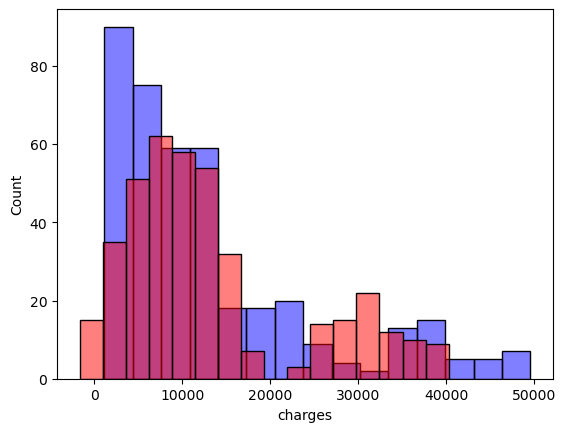

In [44]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [45]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4010.068541065532
Mean Squared Error:  29967416.17026863
Root Mean Squared Error:  5474.250283853364


# K- Nearest Neighbour Regressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(X_train_concat,y_train)
y_test_pred=regressor.predict(X_test_concat)
metrics.mean_absolute_error(y_test,y_test_pred)

3693.1816493258148

<AxesSubplot:xlabel='charges', ylabel='Count'>

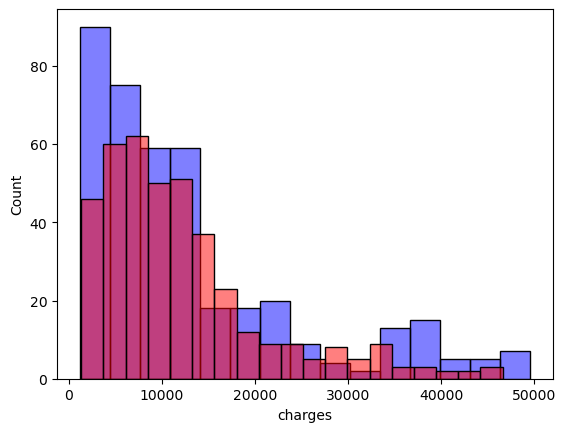

In [47]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [48]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3693.1816493258148
Mean Squared Error:  36041859.670501545
Root Mean Squared Error:  6003.487292441081


# Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train_concat,y_train)
y_test_pred=regressor.predict(X_test_concat)
metrics.mean_absolute_error(y_test,y_test_pred)


2646.218203130326

<AxesSubplot:xlabel='charges', ylabel='Count'>

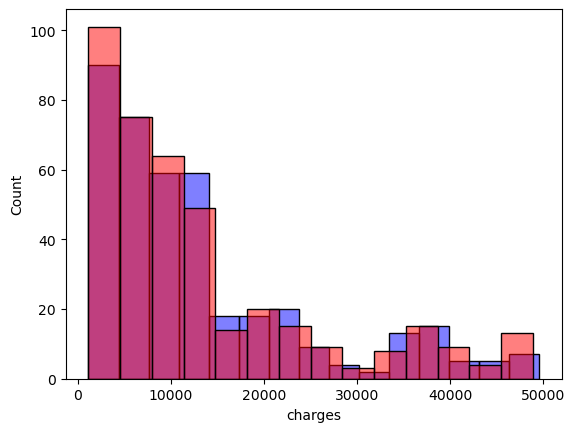

In [50]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [51]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2646.218203130326
Mean Squared Error:  33594044.485671595
Root Mean Squared Error:  5796.0369637944505


# SVR

In [52]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(X_train_concat,y_train)
y_test_pred=regressor.predict(X_test_concat)
metrics.mean_absolute_error(y_test,y_test_pred)

8133.552148617678

<AxesSubplot:xlabel='charges', ylabel='Count'>

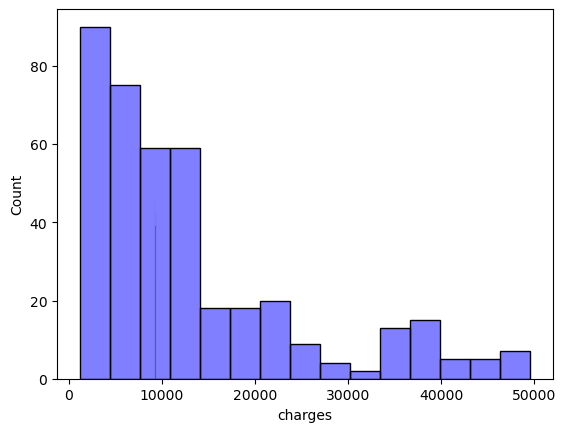

In [53]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [54]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8133.552148617678
Mean Squared Error:  147913253.80031845
Root Mean Squared Error:  12161.959291179955


# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train_concat,y_train)
y_test_pred=regressor.predict(X_test_concat)
metrics.mean_absolute_error(y_test,y_test_pred)

2444.2481490314544

<AxesSubplot:xlabel='charges', ylabel='Count'>

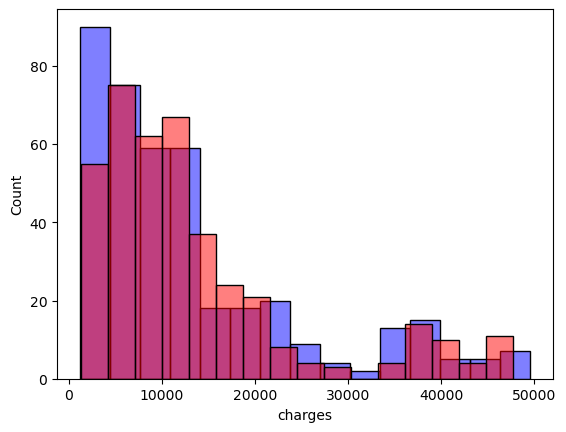

In [56]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [57]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2444.2481490314544
Mean Squared Error:  19815993.1901742
Root Mean Squared Error:  4451.51583061031


# Gradient Boosting Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_regression = GradientBoostingRegressor()
GBDT_regression.fit(X_train_concat, y_train)
y_test_pred = GBDT_regression.predict(X_test_concat)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2241.13466602777

<AxesSubplot:xlabel='charges', ylabel='Count'>

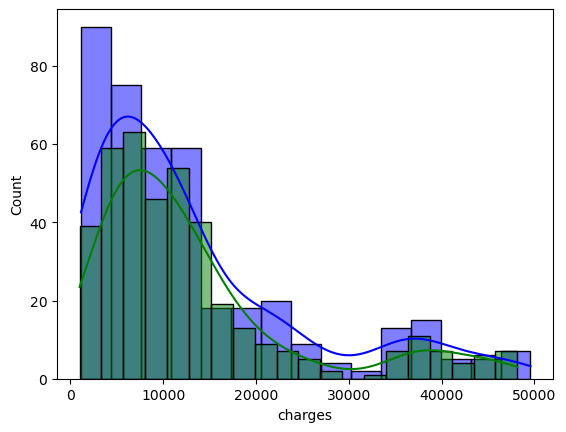

In [59]:
sns.histplot(y_test, color = 'blue', kde = True)
sns.histplot(y_test_pred, color = 'green', kde = True)

In [60]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2241.13466602777
Mean Squared Error:  17324263.060019772
Root Mean Squared Error:  4162.242551800624


# Observation :
## Gradient Boosting Regression Algorithm is the best model for Medical Cost Prediction as it is giving the least Mean Absolute Error.